<a href="https://colab.research.google.com/github/rajivdahal/10daysml/blob/master/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df =sns.load_dataset('iris')
#Iris dataset is the classification of clower species with different species

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
df = df[df['species']!='virginica']

In [6]:
df['species'].unique()

array(['setosa', 'versicolor'], dtype=object)

In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [8]:
#instad of categorical features I want to pass some numerical data to process by our modal

In [9]:
#Appying one hot encoding, using get_dummies from pandas but you cannot use this in dependent features only in independent features you can use
# df_processed = pd.get_dummies(df,columns=['species']) #without dropping one column
# df_processed = pd.get_dummies(df,columns=['species'], drop_first=True) #by dropping one column
#however you can replace by map of pandas
df['species']=df['species'].map({"setosa":0,"versicolor":1})

<ipython-input-9-f6ccc2629177>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species']=df['species'].map({"setosa":0,"versicolor":1})


In [10]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [11]:
df.size

500

In [12]:
#divide features into dependent and independent features
X= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [13]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [15]:
y.unique()

array([0, 1])

In [16]:
from  sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
X_train.size

320

In [19]:
regression = LogisticRegression()

In [20]:
from sklearn.model_selection import GridSearchCV
parameter = {'C':[0.5,1,2,3,5,6,7,9,0,20,50], 'penalty':['l1','l2','elasticnet']}
log_regressor = GridSearchCV(regression,parameter,scoring='accuracy',cv=5)
log_regressor.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
115 fits failed out of a total of 165.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 5, 6, 7, 9, 0, 20, 50],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [21]:
print(log_regressor.best_params_)

{'C': 0.5, 'penalty': 'l2'}


In [22]:
print(log_regressor.best_score_)

1.0


In [29]:
y_pred = log_regressor.predict(X_test)

In [30]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [24]:
y_test

83    1
53    1
70    1
45    0
44    0
39    0
22    0
80    1
10    0
0     0
18    0
30    0
73    1
33    0
90    1
4     0
76    1
77    1
12    0
31    0
Name: species, dtype: int64

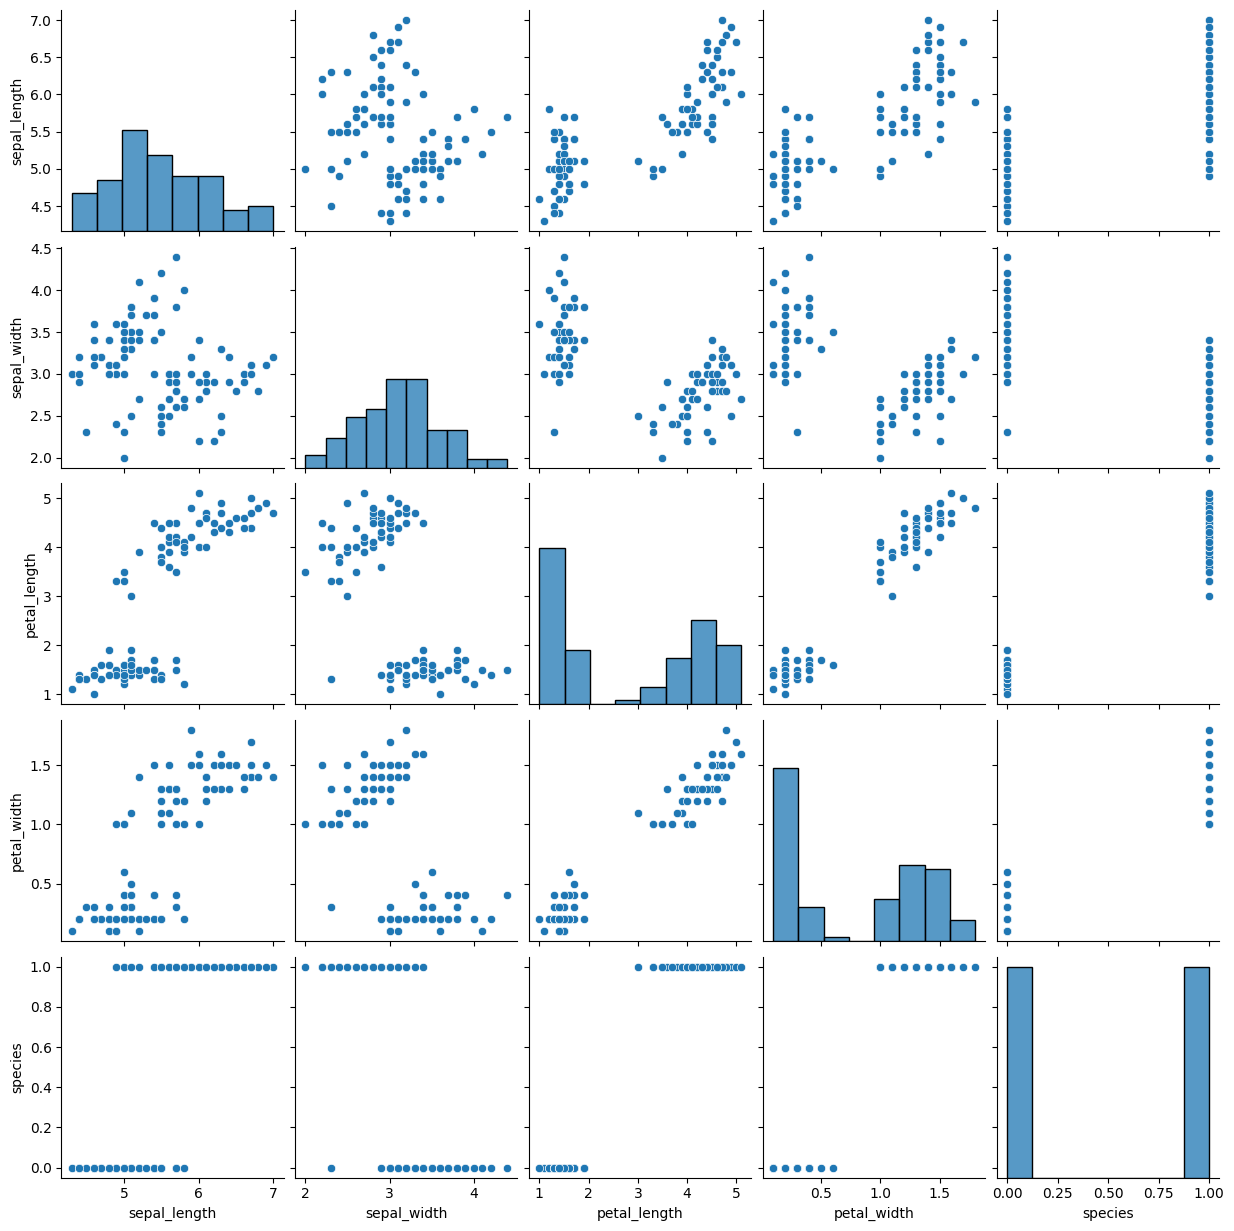

In [25]:
#100% accuracy because data are clearly seperated
sns.pairplot(df)

In [34]:
#calculating the accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, f1_score

In [32]:
confusion_matrix(y_test, y_pred)
#Zero false positive and zero false negative; every are true positive and true negative

array([[12,  0],
       [ 0,  8]])

In [35]:
f1_score(y_test,y_pred)

1.0

**bRemoving setosa and trying the combination with versicolor and virginica**